# Raster Analysis

- merging files to create a `mosaic`
- clipping rasters with polygons
- reclassifying raster data
- performing slope analysis

In [7]:
import rioxarray
import matplotlib.pyplot as plt

raster1 = rioxarray.open_rasterio('../data/agis/L4133A.tif').rio.reproject("EPSG:3067")
raster2 = rioxarray.open_rasterio('../data/agis/L4133B.tif').rio.reproject("EPSG:3067")
raster3 = rioxarray.open_rasterio('../data/agis/L4133C.tif').rio.reproject("EPSG:3067")
raster4 = rioxarray.open_rasterio('../data/agis/L4133D.tif').rio.reproject("EPSG:3067")

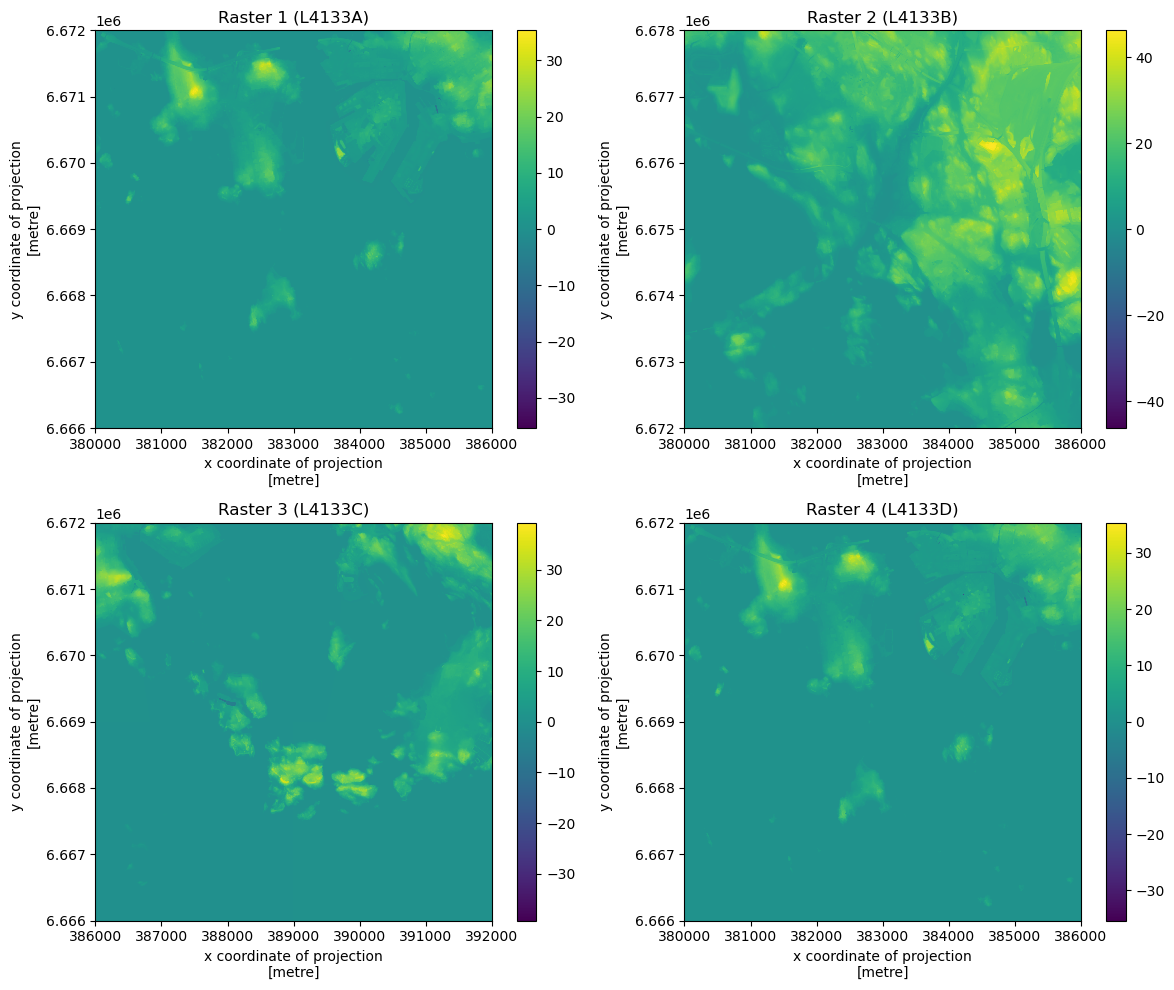

In [2]:
f, axs = plt.subplots(2, 2, figsize=(12,10))
raster1.plot(ax=axs[0,0], cmap='viridis')
axs[0,0].set_title('Raster 1 (L4133A)')
raster2.plot(ax=axs[0,1], cmap='viridis')
axs[0,1].set_title('Raster 2 (L4133B)')
raster3.plot(ax=axs[1,0], cmap='viridis')
axs[1,0].set_title('Raster 3 (L4133C)')
raster1.plot(ax=axs[1,1], cmap='viridis')
axs[1,1].set_title('Raster 4 (L4133D)')
plt.tight_layout()
plt.show()

# Creating a mosaic

>Ensure that the rasters are aligned

In [3]:
import xarray as xr
# Ensure all rasters have the same CRS
assert raster1.rio.crs == raster2.rio.crs == raster3.rio.crs == raster4.rio.crs, "Rasters have different CRS"

In [5]:
from rioxarray.merge import merge_arrays

In [8]:
mosaic_merged = merge_arrays([raster1, raster2, 
                              raster3, raster4])

In [13]:
#mosaic_merged.rio.to_raster('merged_raster.tif')

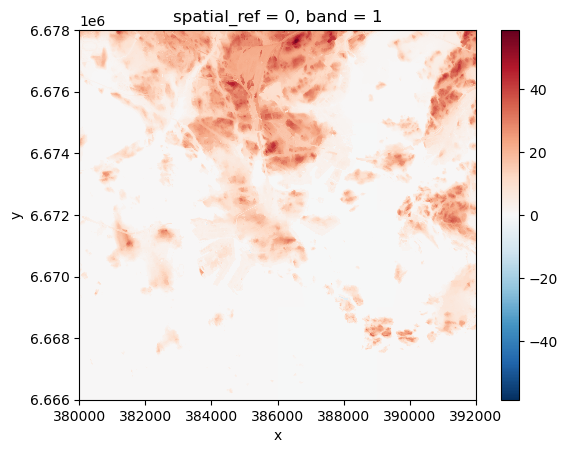

In [14]:
mosaic_merged.plot()